# AI in Medicine <br> Intro to ML and scikit-learn



***Tutor:*** Konstantine Tsafatinos <br>
***Institution:*** Charité - Universitätsmedizin Berlin <br>
***Email:*** konstantinos.tsafatinos@bccn-berlin.de <br>

## Goal of this Session:

We want to introduce you to the basic concepts of machine learning and how to use python and scikit-learn to apply these concepts. By the end of this session, you should be familiar with:

- the difference between supervised and unsupervised learning:
    - classification vs regression in supervised learning
- loading, exploring and preprocessing a dataset; specifically a csv file
- how and why we split data into training and test sets
- training a model on the training set
- evaluating the performance of a model on the test set
- using various performance measures to validate a model

**note:** see slides for an overview of the first topic.

## Import python libraries

For this session, you will need to make sure the following packages are installed:

- numpy
- scikit-learn
- pandas
- matplotlib
- seaborn

In [1]:
# import libraries for data loading and manipulation
import numpy as np
import pandas as pd


# import function for splitting our data 
from sklearn.model_selection import train_test_split
# import model classes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
# import useful functions from the metrics module to evaluate our model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# import lbraries used for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data Loading, Exploration and Preprocessing

Here we will introduce two ways of loading your data using numpy and pandas.

In [2]:
# load csv into a numpy array
data = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)
data_labels = np.loadtxt('diabetes.csv', dtype=str, delimiter=',', max_rows=1)


# load csv into a pandas dataframe
df = pd.read_csv('diabetes.csv')

In [3]:
# print loaded data to visualize the difference between dataframe and array
# visualize the first 5 entries of our dataframe using the head() method.
print(df)
print(data)
print(data_labels)
df.head()

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now that we have loaded the data, we assign variables to our features and labels used to train our model.

**NOTE:** We are only going to use the first 100 data points for this tutorial. You will have to follow these steps on the full dataset later.

### Using Numpy


In [4]:
# separate data into feature vectors and labels
x_np, y_np = data[:100, :-1], data[:100, -1]

### Using Pandas

Pandas DataFrames allow you to access data in the rows or columns in multiple ways. Two common ways of doing so is using the iloc or loc methods. iloc allows you to index your DataFrame like a np.ndarray using the indices of that array. loc allows you to access your rows and columns using the labels read in from the csv file. If no row labels are specified, pandas will use the indices as the row labels. It is worth noting that when using loc, the start and stop values are both included in the slicing. This is different from the usual python slices that include the starting index but exclude the stopping one. Hence the diffences in how we access rows and columns of our Dataframe using loc and iloc below.

In [5]:
# separate data into feature vectors and labels
x_pd, y_pd = df.iloc[:100, :-1], df.iloc[:100, -1]
x_pd2, y_pd2 = df.loc[:99, :'Age'], df.loc[:99, 'Outcome']

In both above examples, we use double assignment to assign values to our variables. Double assignment is a nice way to assign different values to two different variables at the same time. It can help reduce lines in your code.

For a sanity check, to make sure that both ways of accessing rows and columns in a DataFrame are equivalent, lets assert the lengths of our features and labels from method 1 and 2 are equal, and then lets print the heads of our feature vectors.

In [6]:
# No assertion errors means that the lengths are indeed equal
assert len(x_pd) == len(x_pd2)
assert len(y_pd) == len(y_pd2)

In [7]:
x_pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
x_pd2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


It looks like both x_pd and x_pd2 are the same :). We will use the pandas implementation moving forward as is has useful class methods we can call.

In [9]:
# use pandas implementation and reassign to x and y
x, y = x_pd, y_pd

Now that we have our data and labels seperated, we an do a little data exploration. It's usually a good idea to visualize the distribution of your labels.

In [10]:
# Pandas dataframes has useful class methods like value_counts.
y_counts = y.value_counts()
n_y = len(y)

print('Counts of each value:')
print(y_counts)

print('\nPercentage of each class')
print(y_counts/n_y*100)

Counts of each value:
0    63
1    37
Name: Outcome, dtype: int64

Percentage of each class
0    63.0
1    37.0
Name: Outcome, dtype: float64


Using the values_counts() method, we can print how many of each class we have and calculate their percentages. In our case, since we are using the first 100 entries, they are equivalent. This will change when you use the whole dataset in the exercises.

### Seaborn

Seaborn has a useful function called countplot() which is convenient for plotting the distribution of our labels. We are also using matplotlib.pyplot to help us label the plot, control its size and save figures.

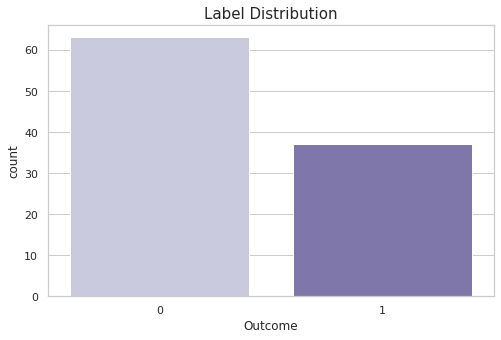

In [11]:
# plot the label count plot
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='Purples')
plt.title('Label Distribution', fontsize=15);
plt.savefig('count_plot');

**NOTE:**

Luckily we are using a dataset that is clean, complete, and in the right shape. In practice, you will come across datasets that need to preprocessed before they can be used to train a classifier.
Some preprocessing steps include:

* Dropping non-numeric values
* Cleaning unneeded columns
* Standardizing labels and/or magnitudes
* Normalizing ranges
* Converting measurement units
* Finding a good representation

## Training and Test Splits

Here we want to split out data set into subsets. One used for training and one used to test the model, hence their names. It is important that we evaluate our model on a subset of the data it has never seen before to ensure that we are not overfitting to the data and that our model can generalize well to unseen data.


We are going to use 20% of our data as the test set by setting the test_size variable to 0.2. The remainding 80% are used to train the classifer. These ratios may vary depending on the size of the dataset we are using, but 20% to 80% is a good starting point.


As a reminder, we are allowed to call the train_test_split function because we imported the function from the sklearn library at the beginning of this notebook. 

In [12]:
# Split the features and labels intro training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Train our Models

Now lets instantiate the three models we imported earlier and fit them to our training data. We will be testing out and evaluating the linear support vector classifier, the support vector classifier with an rbf kernel and the logistic regression classifier.

### Linear Support Vector Classifier

In [13]:
# Instantiate an object of the model class
linsvc = LinearSVC()

# fit the model to our train data using a class method
linsvc.fit(x_train, y_train)

/home/yuda/.pyenv/versions/3.7.5/envs/bccn/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Reading the warning message from python, it appears as though our linear SVC did not converge. This may imply that our data is not linearly separable and that our other two classifiers might be better suited the for the classification task. Lets forget the linear SVC and try our the other classifiers.

### Support Vector Classifier with an RBF Kernel

The SVC class kernel defaults to rfb. This is good for separating non-linearly separable data.
We set probability to True when instantiating our SVC class in order to get a probability estimate of the labels. SVC uses 5-fold cross-validation internally to compute the probabilities. We will use these probabilities in the evaluation of our model.

In [14]:
# Instantiate an object of the model class
svc = SVC(probability=True)

# fit the model to our train data using a class method
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Logistic Regression Classifier

A logistic regression classifier is also good for separating non-linearly separable data. We set the max iterations of our logistic classigier to 200 when we instantiate our class because it did not converges with the default value of 100.

In [15]:
# Instantiate an object of the model class
logreg = LogisticRegression(max_iter=200)

# fit the model to our train data using a class method
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that we have two model that have been fit to our training data, we can use our test data to evaluate them.

## Evaluate our Models


### Make predictions

We can make predictions on the test set that we will later compare to the respective true labels to evaluate of our model.

In [16]:
# use the predict() method from our model classes to predict labels given the test set of features x_test.
y_pred_svc = svc.predict(x_test)
y_pred_log = logreg.predict(x_test)

### Accuracy

Accuracy is a common metric used to evaluate a model. Here we will compute the accuracies of both of our models.

In [17]:
# we are using the model class method score() to return the accuracy of predictions from each model.
print('Accuracy of Support Vector classifier on test set: {:.2f}'.format(svc.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Support Vector classifier on test set: 0.50
Accuracy of logistic regression classifier on test set: 0.55


Although accuracy is a common metric, it often does not tell the whole story.

We need other ways to asses how well our classifier performs.


_Successful predictions_ are only one of the possible outcomes of a prediction from a classifier. These outcomes can be generalized using the following four classes:

- True positives
- False positives
- True negatives
- False negatives

<table>
    <tr>
        <td>
            <img src="images/confusion_matrix.png" width="500" height="600"/>
        </td>
        <td>
            <img src="images/confusion_matrix_pregnancy.png" width="500" height="600"/>
        </td>
    </tr>
</table>

### Confusion Matrices

We can visualize the distribution of prediction classes predicted using a classifier by plotting a confusion matrix. We now use the plot_confusion_matrix function we imported above to visualize the distribtion of True Positives, False Positives, False Negatives, True Negatives for both of our classifiers.

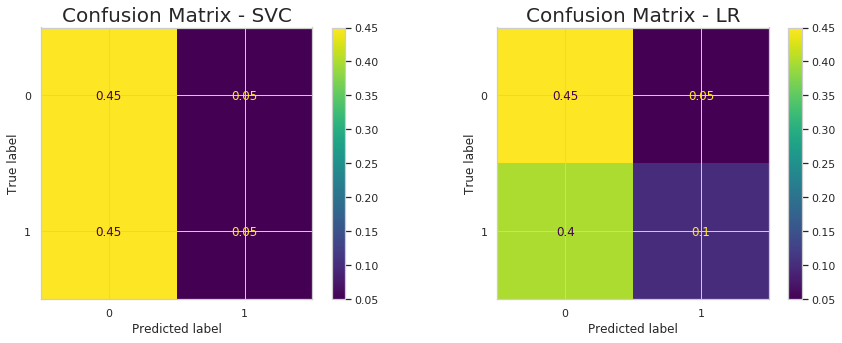

In [18]:
# Check the documentation to know what variables to use!
plt.figure(figsize=(15, 5))
plot_confusion_matrix(svc, x_test, y_test, normalize='all', ax=plt.subplot(1, 2, 1))
plt.title('Confusion Matrix - SVC', fontsize=20);
plot_confusion_matrix(logreg, x_test, y_test, normalize='all', ax=plt.subplot(1, 2, 2))
plt.title('Confusion Matrix - LR', fontsize=20);

We can compare the confusion matrices with each other and with the accuracy scores. Be sure to note that the color bars are *not* on the same scale.

### Precision, Recall, F$_{1}$-Score and Support

<table>
    <tr>
        <td style="text-align:left">
            
**Variable Definitions**

- $tp =$ true positives
- $fp =$ false positives
- $tn =$ true negatives
- $fn =$ false negatives


**Precision**

$p = \frac{tp}{tp + fp}$, how precise the model is when classifying a sample as positive. <br><br>
It can be thought of as the classifiers ability to **not** misclassify negatives samples.

**Recall**

$r = \frac{tp}{tp + fn}$, is a measure of the ability of the classifer to find all positive samples.

**F$_{1}$-Score**

$\text{F}_{1} = \frac{2}{\text{recall}^{-1} + \text{ precision}^{-1}} = 2 \cdot \
\frac{\text{recall } \cdot \text{ precision}}{\text{recall } + \text{ precision}}$, the harmonic mean between precision and recall. <br><br>

An F$_{1}$-score reaches its best value at 1; perfect precision and recall.


**Support**

The support is the number of occurrences of each class in our test set.    
        </td>
        <td>
            <img src="images/Precisionrecall.svg.png" width="250" height="300"/>
        </td>
    </tr>
</table>

In [19]:
# print classification reports for each classifier
print('Classification Report for SVC:\n')
print(classification_report(y_test, y_pred_svc))
print('\n\nClassification Report for LR:\n')
print(classification_report(y_test, y_pred_log))

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.50      0.90      0.64        10
           1       0.50      0.10      0.17        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.40        20
weighted avg       0.50      0.50      0.40        20



Classification Report for LR:

              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.67      0.20      0.31        10

    accuracy                           0.55        20
   macro avg       0.60      0.55      0.49        20
weighted avg       0.60      0.55      0.49        20



### Receiver Operating Characteristic (ROC) Curve

The ROC curve is a graph that shows the performance of a classification model at all thresholds. It is a common choice for assessing a binary classifier. The ROC curve is a plot of the True Positive Rate (recall) vs the False Positive Rate. The dotted red line indicates the performance of a random classifier that has a 50% chance of outputting either label. The area under the curve (AUC) of the ROC curve is a measure that tells us how well our classifier can distinguish between the classes.

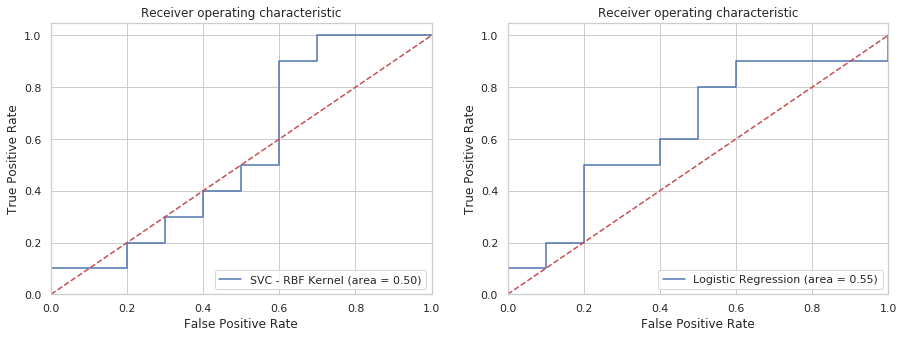

In [20]:
# set figure dimensions
plt.figure(figsize=(15, 5))


# compute and plot the AUC and ROC values for the support vector classifier
svc_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='SVC - RBF Kernel (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVC_ROC')


# compute and plot the AUC and ROC values for the logistic regression classifier
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC');

**NOTE:** The behaviour of the ROC curves and the AUC is not very consistent using such a small subset of the data. You will see this behaviour change when implementing it yourself on the full dataset. These plots become more consistent and informative as our dataset increases in size.

This is a good basis of metrics you can use to evaluate your models. In practice, you will use n-fold cross-validation and permutation tests to better compare models, tune hyperparameters, and get better estimates for our metrics. This will result in a clearer picture of how the models preform, and which models to use for classification of novel data.

## Exercises

Going through these exercises, you will develope a better undertanding of how to train and test models given a dataset. We suggest that you use the above code as a reference but do **NOT** simply copy and paste. You will gain a deeper understanding if your type the code yourself, implement the functions, and use docs to understand how functions work and what parameters to pass in.

### 1. Create new x (features) and y (labels) variables that contain the whole data set

In [21]:
# Hint: There is no need to reload the data. Just reuse the data or df variables that have 
#       already read in the csv file. We suggest using pandas implementation so you can easily
#       the label counts, but either way will work.


# YOUR CODE GOES HERE

### 2. Use Seaborn to plot your label counts for the dataset

If you have used the pandas, print out the label counts and calculate their percentages. If you have used numpy, calculate and print the counts and percentages by figuring out how many of each class have, and divide the numbers of each class by the total number of labels.

In [22]:
# Note: Play around with the plt methods and parameter to see how it changes the 
#       display of your plots.


# YOUR CODE GOES HERE

### 3. Split your data into training and test sets

You should use the train_test_split function imported from sklearn. We want you to use a test set size of 20%.

In [23]:
# Note: Once you have finished all the exercises, vary percent of data used for the test set
#       and see how it affects the performance of your models.


# YOUR CODE GOES HERE

### 4. Train your Models

We saw from before that the linear SVC did not converge. Implement the SCV and Logistic Regression models and them to the training data.

In [24]:
# Hint: Remember to compute the probabilities for SVC and make sure that the logistic regression 
#       model converges.


# YOUR CODE GOES HERE

### 5. Evaluate your Models

#### a) Predict the labels of the test set using both classifiers

In [25]:
# Hint: Use the predict method from the classifier class


# YOUR CODE GOES HERE

#### b) Compute and print the Accuracy both models

In [26]:
# Hint: Use the score method from each model class.


# YOUR CODE GOES HERE

#### c) Plot the confusion matrices from each classifier

In [27]:
# Hint: Use the plot_confusion_matrix function import from sklearn


# YOUR CODE GOES HERE

#### d) Print out the Precision, Recall, F1-Score and Support for both classifiers

In [28]:
# Hint: Use the classification_report function


# YOUR CODE GOES HERE

#### e) Plot the ROC curves and compute the AUC for both classifiers

In [29]:
# Hint: Use the roc_auc_score and roc_curve functions


# YOUR CODE GOES HERE